# Import

In [32]:
import supervision as sv
from inference import get_model
import cv2
import numpy as np
from PIL import Image

# Model yolov8s-640

In [33]:
image = cv2.imread("beach.png")
model = get_model("yolov8s-640")

def slicer_callback(slice: np.ndarray) -> sv.Detections:
    result = model.infer(slice)[0]
    detections = sv.Detections.from_inference(result)
    return detections

slicer = sv.InferenceSlicer(
    callback=slicer_callback,
    slice_wh=(512, 512),
    overlap_ratio_wh=(0.4, 0.4),
    overlap_filter=sv.OverlapFilter.NONE
)
detections = slicer(image)



SupervisionWarnings: `overlap_ratio_wh` in `InferenceSlicer.__init__` is deprecated and will be removed in `supervision-0.27.0`. Please manually set it to `None` and use `overlap_wh` instead.


In [34]:
annotated_frame = sv.BoundingBoxAnnotator().annotate(
    scene=image.copy(),
    detections=detections
)
img = Image.fromarray(annotated_frame)
img.save('output_image.png')

SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


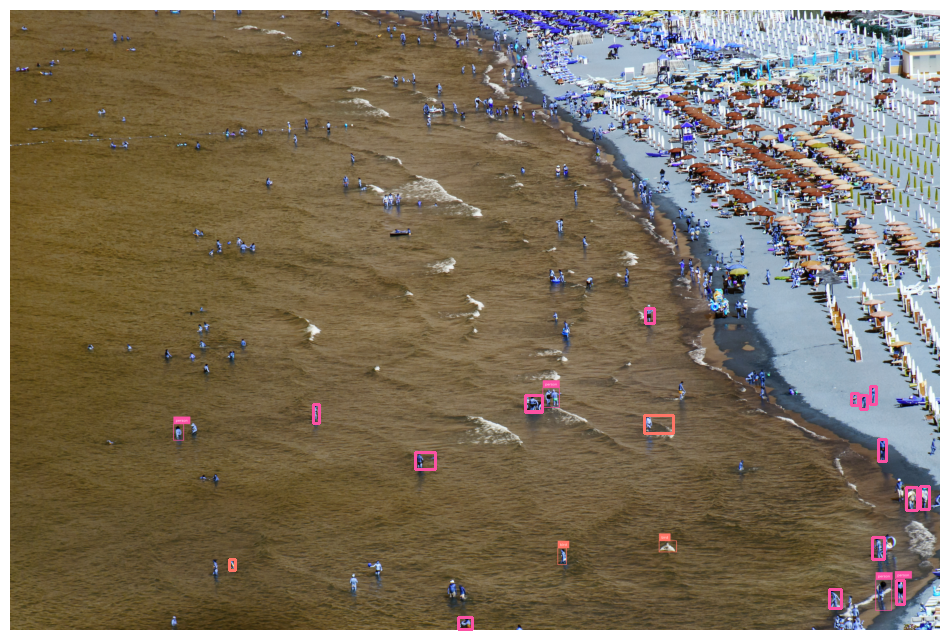

In [35]:
img

# Model yolov8s-seg-640

In [36]:
model = get_model(model_id="yolov8s-seg-640")
image = cv2.imread("beach.png")

def callback(image_slice: np.ndarray) -> sv.Detections:
    results = model.infer(image_slice)[0] 
    detections = sv.Detections.from_inference(results)
    return detections

slicer = sv.InferenceSlicer(callback=callback)
detections = slicer(image)

SupervisionWarnings: `overlap_ratio_wh` in `InferenceSlicer.__init__` is deprecated and will be removed in `supervision-0.27.0`. Please manually set it to `None` and use `overlap_wh` instead.


In [37]:
annotated_frame = sv.BoundingBoxAnnotator().annotate(
    scene=image.copy(),
    detections=detections
)

img = Image.fromarray(annotated_frame)
img.save('output_image.png')

SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


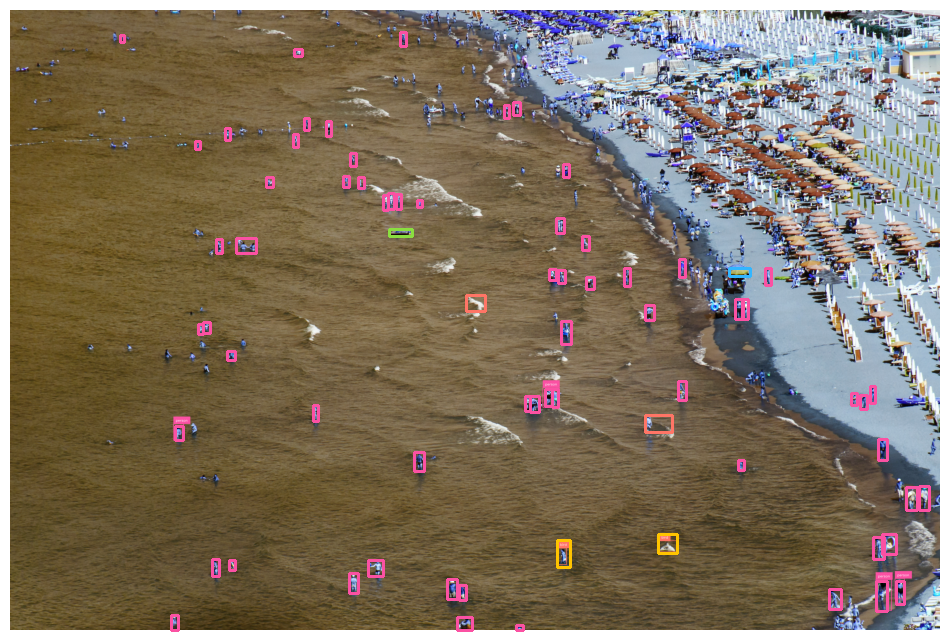

In [38]:
img

# Testing The API

In [50]:
import requests
import base64

def predict_image(image_path):
    with open(image_path, "rb") as image_file:
        encoded_string = base64.b64encode(image_file.read()).decode('utf-8')

    url = "http://127.0.0.1:6060/api/predict"
    payload = {"image": encoded_string}
    headers = {"Content-type": "application/json"}

    response = requests.post(url, json=payload, headers=headers)
    return response.json()

if __name__ == "__main__":
    image_path = "beach.png"  # Replace with your image path
    result = predict_image(image_path)
    print(result)

{'image': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAIBAQEBAQIBAQECAgICAgQDAgICAgUEBAMEBgUGBgYFBgYGBwkIBgcJBwYGCAsICQoKCgoKBggLDAsKDAkKCgr/2wBDAQICAgICAgUDAwUKBwYHCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgr/wAARCAKAA7YDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD9/KKK/Jb/AIKZ/wDBT79s/wDZ3/bh8bfB34VfG+TRfD2jjTf7OsP+Ea0y5WPzdNtZ5PnmtnkOZJXb5mON2BgAAcOPx9HLqKqVU2m7aW7N9Wux0YbDVMVNxhulfU/Wmivwfj/4LQ/8FF5ZwE/aVmww4B8G6Nt9+

In [51]:
import io, base64
from PIL import Image

# Assuming base64_str is the string value without 'data:image/jpeg;base64,'
img = Image.open(io.BytesIO(base64.decodebytes(bytes(result["image"], "utf-8"))))
img.save('my-image.jpeg')

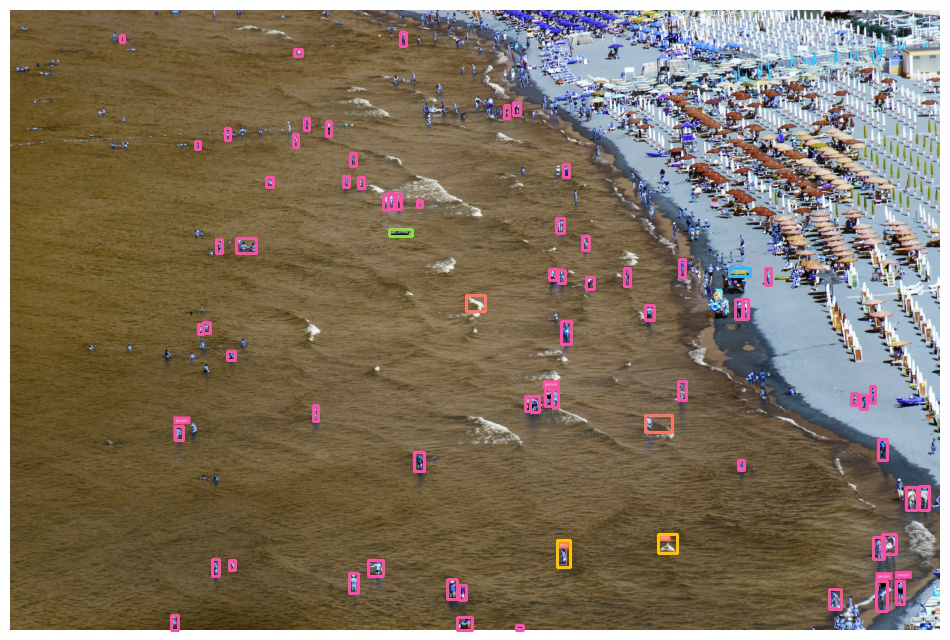

In [52]:
img